Implement a 2-class classification neural network with a single hidden layer

Data Generation:

We create a synthetic dataset with 100 samples and 2 features. The target label is 1 if the sum of the features is greater than 0, otherwise 0.
Train-Test Split:

The dataset is split into training and test sets using train_test_split.
Data Conversion:

The data is converted into PyTorch tensors, which are necessary for PyTorch operations. The labels are reshaped using unsqueeze(1) to match the expected input shape for the loss function.
Model Definition:

The neural network model BinaryClassificationNN consists of two fully connected layers. The first layer connects the input features to 10 hidden neurons, followed by a ReLU activation function. The second layer outputs a single value, which is passed through a sigmoid function to produce a probability.
Loss Function and Optimizer:

BCELoss (Binary Cross-Entropy Loss) is used as the loss function, suitable for binary classification problems. The Adam optimizer is used to minimize the loss.
Training:

The model is trained for 100 epochs. In each epoch, the model's predictions are calculated, the loss is computed and backpropagated, and the optimizer updates the model's parameters. The loss for each epoch is recorded.
Testing and Evaluation:

The model's performance is evaluated on the test set. Predictions are compared with the actual labels to compute the accuracy.
Plotting:

The training loss over epochs is plotted to visualize the learning process, and the test accuracy is printed.

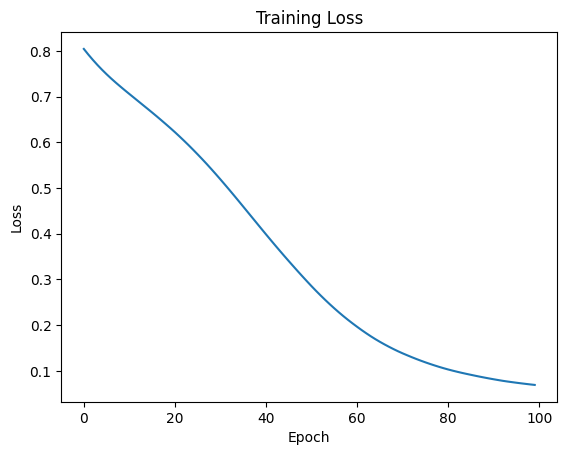

Test Accuracy: 0.9666666666666667


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Generate a simple synthetic dataset
np.random.seed(0)
X = np.random.randn(100, 2)  # 100 samples, 2 features
y = (X[:, 0] + X[:, 1] > 0).astype(int)  # Labels: 1 if sum of features > 0, else 0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define the Neural Network model
class BinaryClassificationNN(nn.Module):
    def __init__(self):
        super(BinaryClassificationNN, self).__init__()
        self.fc1 = nn.Linear(2, 10)  # Input layer to hidden layer
        self.fc2 = nn.Linear(10, 1)  # Hidden layer to output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Apply ReLU activation
        x = torch.sigmoid(self.fc2(x))  # Apply Sigmoid activation
        return x

# Initialize the model, loss function, and optimizer
model = BinaryClassificationNN()
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training the model
num_epochs = 100
train_losses = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())

# Testing the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predictions = (test_outputs > 0.5).float()
    accuracy = accuracy_score(y_test_tensor, predictions)

# Plot the training loss
plt.plot(train_losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

print(f"Test Accuracy: {accuracy}")
